In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wines = pd.read_csv('/Users/erinberridge/blendbud/wine_data3.csv')
print(wines.head())

        id             name             type   acidity  fizziness  intensity  \
0  1171671          Margaux          Margaux  4.245219        NaN   3.827806   
1  1112219          Pomerol          Pomerol  3.289715        NaN   4.291344   
2  1194181          Pomerol          Pomerol  3.435617        NaN   4.231121   
3     2472           Malbec           Malbec  2.820961        NaN   3.900594   
4    31554  Sauvignon Blanc  Sauvignon Blanc  4.060016        NaN   2.989165   

   sweetness    tannin  flavor1   flavor2  flavor3     flavor4        flavor5  \
0   1.350550  3.804564      oak   leather     plum  blackberry         earthy   
1   1.516721  3.535764      oak   leather  tobacco        plum        vanilla   
2   1.597392  3.507980      oak      plum  leather     tobacco        vanilla   
3   2.097881  2.680519  leather       oak  tobacco        plum     dark fruit   
4   1.301605       NaN   citrus  tropical     lime  grapefruit  passion fruit   

   average_rating  price_amount 

In [4]:
X = wines[["acidity", "intensity", "sweetness", "tannin", "price_amount"]] #independent columns
y = wines[["average_rating"]] #target column

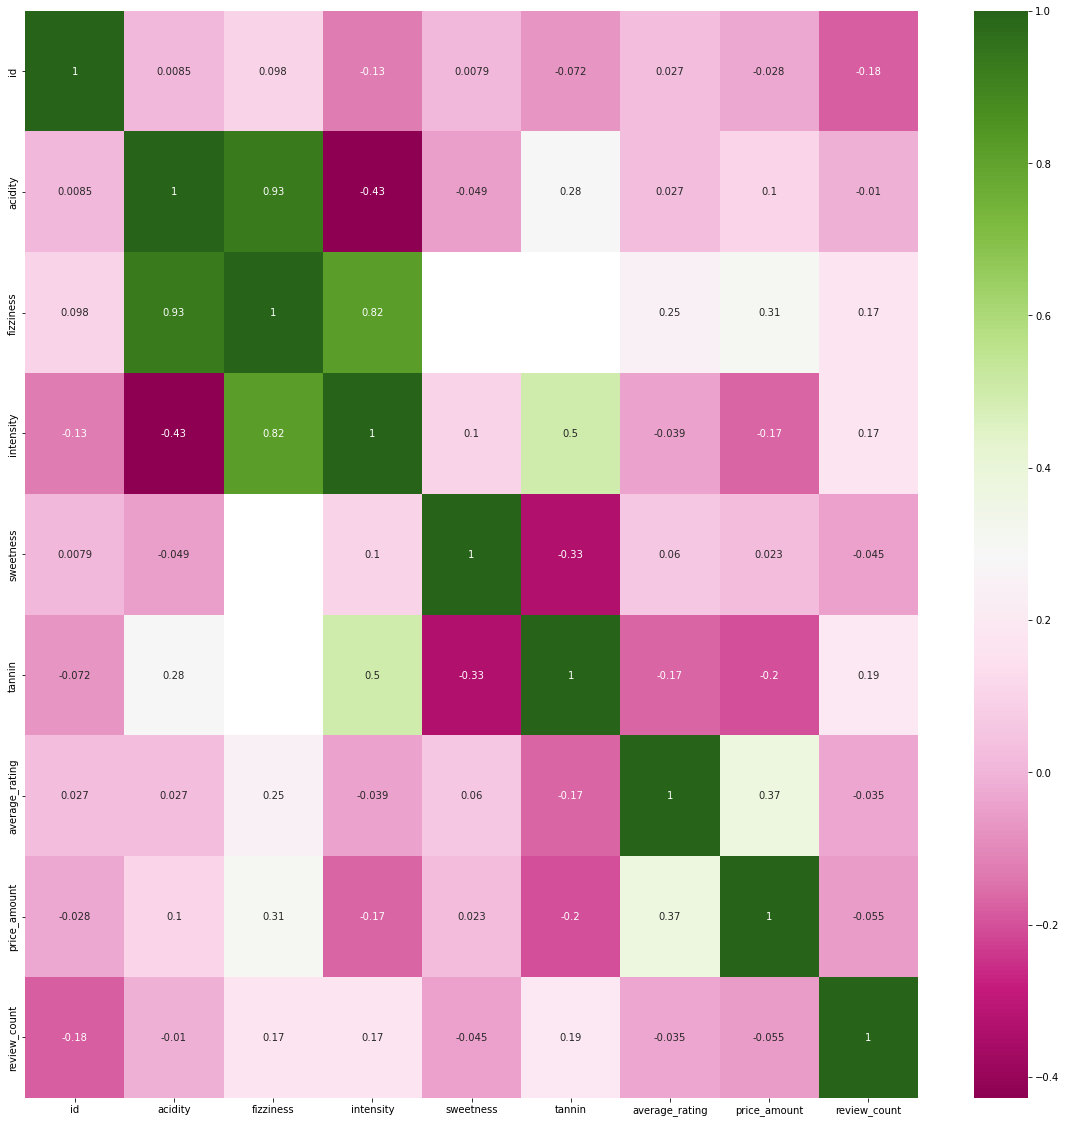

In [5]:
# Create correlation matrix, create heatmap of correlation coefficients
corr_matrix = wines.corr()
features = corr_matrix.index
plt.figure(figsize=(20,20))
hm = sns.heatmap(wines[features].corr(),annot=True,cmap="PiYG")

The majority of relevant info is in the average_rating row, where we can see the correlation coefficients with each feature (perfect correlation with itself)

The features with the biggest influence on rating appear to be price, fizziness, and tannin. Intensity and acidity also have smaller effect. Price is large and positive (0.37), which makes sense to me as expensive wines will have higher ratings generally.

The fizziness impact (0.25) I can't really explain (my basic research says fizziness is generally not desirable-- so maybe here it means champagne?). Tannin has a negative impact on rating (-0.17) which makes sense because it's what causes a dry/rubbing sensation on your tongue. I don't like that either.

s/n: Tannin and acidity (0.28) correlated, checks out with research.

I'm currently thinking if we do a clustering recommending algorithm, it would be good to create clusters based on price, tannin, and fizziness. Could look into taking into account what features are important to the individual user, not just based on this data.

Looking at the primary flavor profiles that have the highest average rating:

In [11]:
wines.groupby('flavor1')['average_rating'].mean().nlargest(10)

flavor1
smoked meats      4.700000
morello cherry    4.600000
green apple       4.500000
licorice          4.500000
brioche           4.433333
smoke             4.433333
mushroom          4.400000
tar               4.400000
truffle           4.400000
black fruit       4.383333
Name: average_rating, dtype: float64

'Smoked meats' and 'morello cherry' appear exactly once in this whole dataset so I'm going to ignore it (also, huh?). Who knows if any of that will be relevant, so carrying on.

In [18]:
all_flavors = pd.concat([wines['flavor1'],wines['flavor2'],wines['flavor3'],wines['flavor4']])
all_flavors

0           oak
1           oak
2           oak
3       leather
4        citrus
         ...   
1043      prune
1044       plum
1045    tobacco
1046        oak
1047     cherry
Length: 4192, dtype: object

In [22]:
flavor_occurrences = all_flavors.value_counts()

In [23]:
flavor_occurrences.head(20)

oak             678
leather         455
blackberry      307
cherry          285
tobacco         244
vanilla         222
plum            189
earthy          146
citrus          112
minerals        112
honey           111
chocolate       107
strawberry      101
raspberry        98
red fruit        70
pepper           66
peach            64
butter           59
blackcurrant     59
apricot          52
dtype: int64

Those seem to be the top 20 flavor profiles we're working with. Could be relevant for something! (Coming back to this later, TBD: kmeans)